In [11]:
import pandas as pd
import plotnine as p

import anndata
import openTSNE
import scvi

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [12]:
adata = anndata.read('SCP1052.lung.counts.2021-05-25T07:25:42.h5ad')

vae = scvi.model.SCVI.load(adata.uns['scvi_model'], adata)

adata

INFO     Using data from adata.X                                                             
INFO     Computing library size prior per batch                                              


/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.
/home/ubuntu/software/anndata/anndata/compat/__init__.py:211:

INFO     Registered keys:['X', 'batch_indices', 'local_l_mean', 'local_l_var', 'labels']     
INFO     Successfully registered anndata object containing 106792 cells, 10004 vars, 24      
         batches, 1 labels, and 0 proteins. Also registered 0 extra categorical covariates   
         and 0 extra continuous covariates.                                                  


/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.


AnnData object with n_obs × n_vars = 106792 × 10004
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Cluster', 'SubCluster', 'Viral+', 'leiden_res_2', 'leiden_res_1.3', 'donor', 'disease', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'tsne_0', 'tsne_1'
    var: 'featureid', 'mean_', 'frac_zero', 'highly_variable', 'observed_fraction_zeros', 'expected_fraction_zeros', 'prob_zero_enriched_nbatches', 'prob_zero_enrichment', 'prob_zero_enrichment_rank', 'required', 'selected'
    uns: 'Nuc-Cell_colors', 'SubCluster_colors', 'W_harmony', '_scvi', 'genome', 'harmony_knn_distances', 'harmony_knn_indices', 'hvg', 'manual_coarse_annotation_colors', 'method_colors', 'modality', 'neighbors', 'pca', 'predictions_colors', 'sample_colors', 'scvi_model', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_scvi', 'X_tsne', 'X_umap', 'sig_background'
    varm: 'PCs', 'de_res'
    layers: 'counts', 'winsorized'

In [119]:
adata.obs['total_count'] = adata.X.sum(1)

for gene in select_genes:
    adata.obs[gene] = adata[:, gene].X.todense()

In [120]:
adata.obs['Cluster'] = adata.obs['Cluster'].pipe(np.array)
adata.obs['SubCluster'] = adata.obs['SubCluster'].pipe(np.array)

select_celltypes = [
    'AT1', 'AT2', 'B cells', 'CD4+ T cells metabolically active', 'CD8+ T cells',
    'Inflammatory monocytes CD14hiCD16hi', 'NK cells',
    'Fibroblast', 'Myofibroblast', 'Macrophage metabolically active',
    
]


sobs = adata.obs.query('SubCluster in @select_celltypes').groupby(['SubCluster']).sample(300).copy()

sadata = adata[sobs.index].copy()

/home/ubuntu/software/anndata/anndata/compat/__init__.py:211: FutureWarning: During AnnData slicing, found matrix at .uns['W_harmony'] that happens to be dimensioned at n_obs×n_obs (106792×106792).

These matrices should now be stored in the .obsp attribute.
This slicing behavior will be removed in anndata 0.8.


In [121]:
select_genes = [
    'SFTPC', 'DLG2', 'MS4A1', 'CD3E', 'CD8A', 'CD14', 'NCAM1', 'RYR1', 'ACTG1', 'CD163',
    'KRT7', 'STAT1', 'IFI16', 'SFTPD', 'SFTPB', 'CXCL2'
]

In [122]:
expr_rates = vae.get_normalized_expression(sadata, gene_list = select_genes, library_size = 1.)

In [123]:
expr_rates

featurekey,ACTG1,CD14,CD163,CD3E,CD8A,CXCL2,DLG2,IFI16,KRT7,MS4A1,NCAM1,RYR1,SFTPB,SFTPC,SFTPD,STAT1
barcodekey,,,,,,,,,,,,,,,,
12-P617758-S008-R01-CGAGGAACATGTGTCA,0.000056,4.519884e-07,4.535117e-07,1.936381e-07,2.482072e-07,1.296509e-05,0.000228,0.000017,6.259352e-04,6.389800e-08,4.652025e-07,0.000004,1.443550e-02,4.874978e-05,2.549807e-04,0.000089
02-P240970-S008-R01-TTTAGTCAGGTTCATC,0.000217,8.847697e-08,2.897669e-07,5.468382e-08,4.323470e-08,3.909562e-05,0.000179,0.000026,1.257112e-03,9.258288e-09,3.627400e-07,0.000004,1.694325e-02,6.124373e-06,2.507737e-04,0.000248
02-P166169-S113-R01-CAAGACTAGTACAGAT,0.000217,6.046454e-07,6.051508e-07,1.208873e-07,1.628626e-07,1.425246e-04,0.000189,0.000033,1.117387e-03,3.476814e-08,1.296453e-06,0.000010,1.961792e-02,8.012004e-06,2.850766e-04,0.000247
02-P166169-S099-R02-GACTACAGTTCGAATC,0.001158,1.376463e-06,1.310887e-07,1.403100e-07,6.565192e-08,9.933478e-05,0.000010,0.000044,3.453030e-03,7.022938e-08,7.120460e-07,0.000009,2.914023e-02,1.600083e-05,5.604448e-04,0.000244
12-P890292-S007-R01-ATCGTGAAGACCACGA,0.000044,3.039422e-07,6.696608e-06,1.572588e-07,5.245286e-08,2.078915e-04,0.000241,0.000024,3.578065e-03,2.403318e-08,1.535915e-07,0.000002,1.312115e-02,1.993213e-05,2.143951e-04,0.000190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
02-P348762-S056-R01-AAGTGAAAGGACGCTA,0.000002,1.989861e-06,8.399609e-06,2.943264e-05,2.196278e-05,2.177919e-07,0.000014,0.001281,4.888713e-07,6.890047e-06,4.237710e-04,0.000003,1.285581e-06,1.613073e-06,4.732279e-07,0.000307
12-P485759-S008-R01-CAAGCTATCGAGATGG,0.000003,1.937133e-07,8.726278e-07,4.041782e-05,6.188183e-05,8.972512e-08,0.000023,0.000876,4.342785e-08,8.887151e-07,9.244848e-04,0.000003,9.694478e-08,3.879006e-08,4.079004e-08,0.000122
02-P348762-S056-R01-AGTCAACCACTTCTCG,0.000006,3.671039e-06,4.872682e-06,3.381139e-05,3.227161e-05,2.292736e-07,0.000007,0.001257,2.856490e-07,4.804578e-06,3.633250e-04,0.000003,2.221151e-07,3.907603e-07,2.091025e-07,0.000385


In [126]:
sobs_long = sobs.reset_index().melt(
    id_vars = ['barcodekey', 'SubCluster', 'total_count', 'donor', 'disease'],
    value_vars = select_genes,
    var_name = 'gene',
    value_name = 'count'
)

sobs_long

,barcodekey,SubCluster,total_count,donor,disease,gene,count
0,12-P617758-S008-R01-CGAGGAACATGTGTCA,AT1,1391.0,D15,COVID-19,SFTPC,0.0
1,02-P240970-S008-R01-TTTAGTCAGGTTCATC,AT1,4052.0,D4,COVID-19,SFTPC,0.0
2,02-P166169-S113-R01-CAAGACTAGTACAGAT,AT1,1732.0,D3_3,COVID-19,SFTPC,0.0
3,02-P166169-S099-R02-GACTACAGTTCGAATC,AT1,1048.0,D3_2,COVID-19,SFTPC,0.0
4,12-P890292-S007-R01-ATCGTGAAGACCACGA,AT1,838.0,D17,COVID-19,SFTPC,0.0
...,...,...,...,...,...,...,...
47995,02-P348762-S056-R01-AAGTGAAAGGACGCTA,NK cells,464.0,D7,COVID-19,CXCL2,0.0
47996,12-P485759-S008-R01-CAAGCTATCGAGATGG,NK cells,910.0,D14,COVID-19,CXCL2,0.0
47997,02-P348762-S056-R01-AGTCAACCACTTCTCG,NK cells,507.0,D7,COVID-19,CXCL2,0.0
47998,02-P334354-S087-R01-TGACAGTGTTTGTTGG,NK cells,675.0,D6,COVID-19,CXCL2,0.0


In [127]:
sobs_long['gene'] = sobs_long['gene'].pipe(pd.Categorical, categories = select_genes)
sobs_long['SubCluster'] = sobs_long['SubCluster'].pipe(pd.Categorical, categories = select_celltypes)

In [129]:
short_names = {
    'AT1': 'AT1',
    'AT2': 'AT2',
    'B cells': 'B',
    'CD4+ T cells metabolically active': 'CD4+T',
    'CD8+ T cells': 'CD8+T',
    'Inflammatory monocytes CD14hiCD16hi': 'Mon',
    'NK cells': 'NK',
    'Fibroblast': 'Fib',
    'Myofibroblast': 'Myof',
    'Macrophage metabolically active': 'Mac'
}

sobs_long['short_name'] = sobs_long['SubCluster'].map(short_names)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


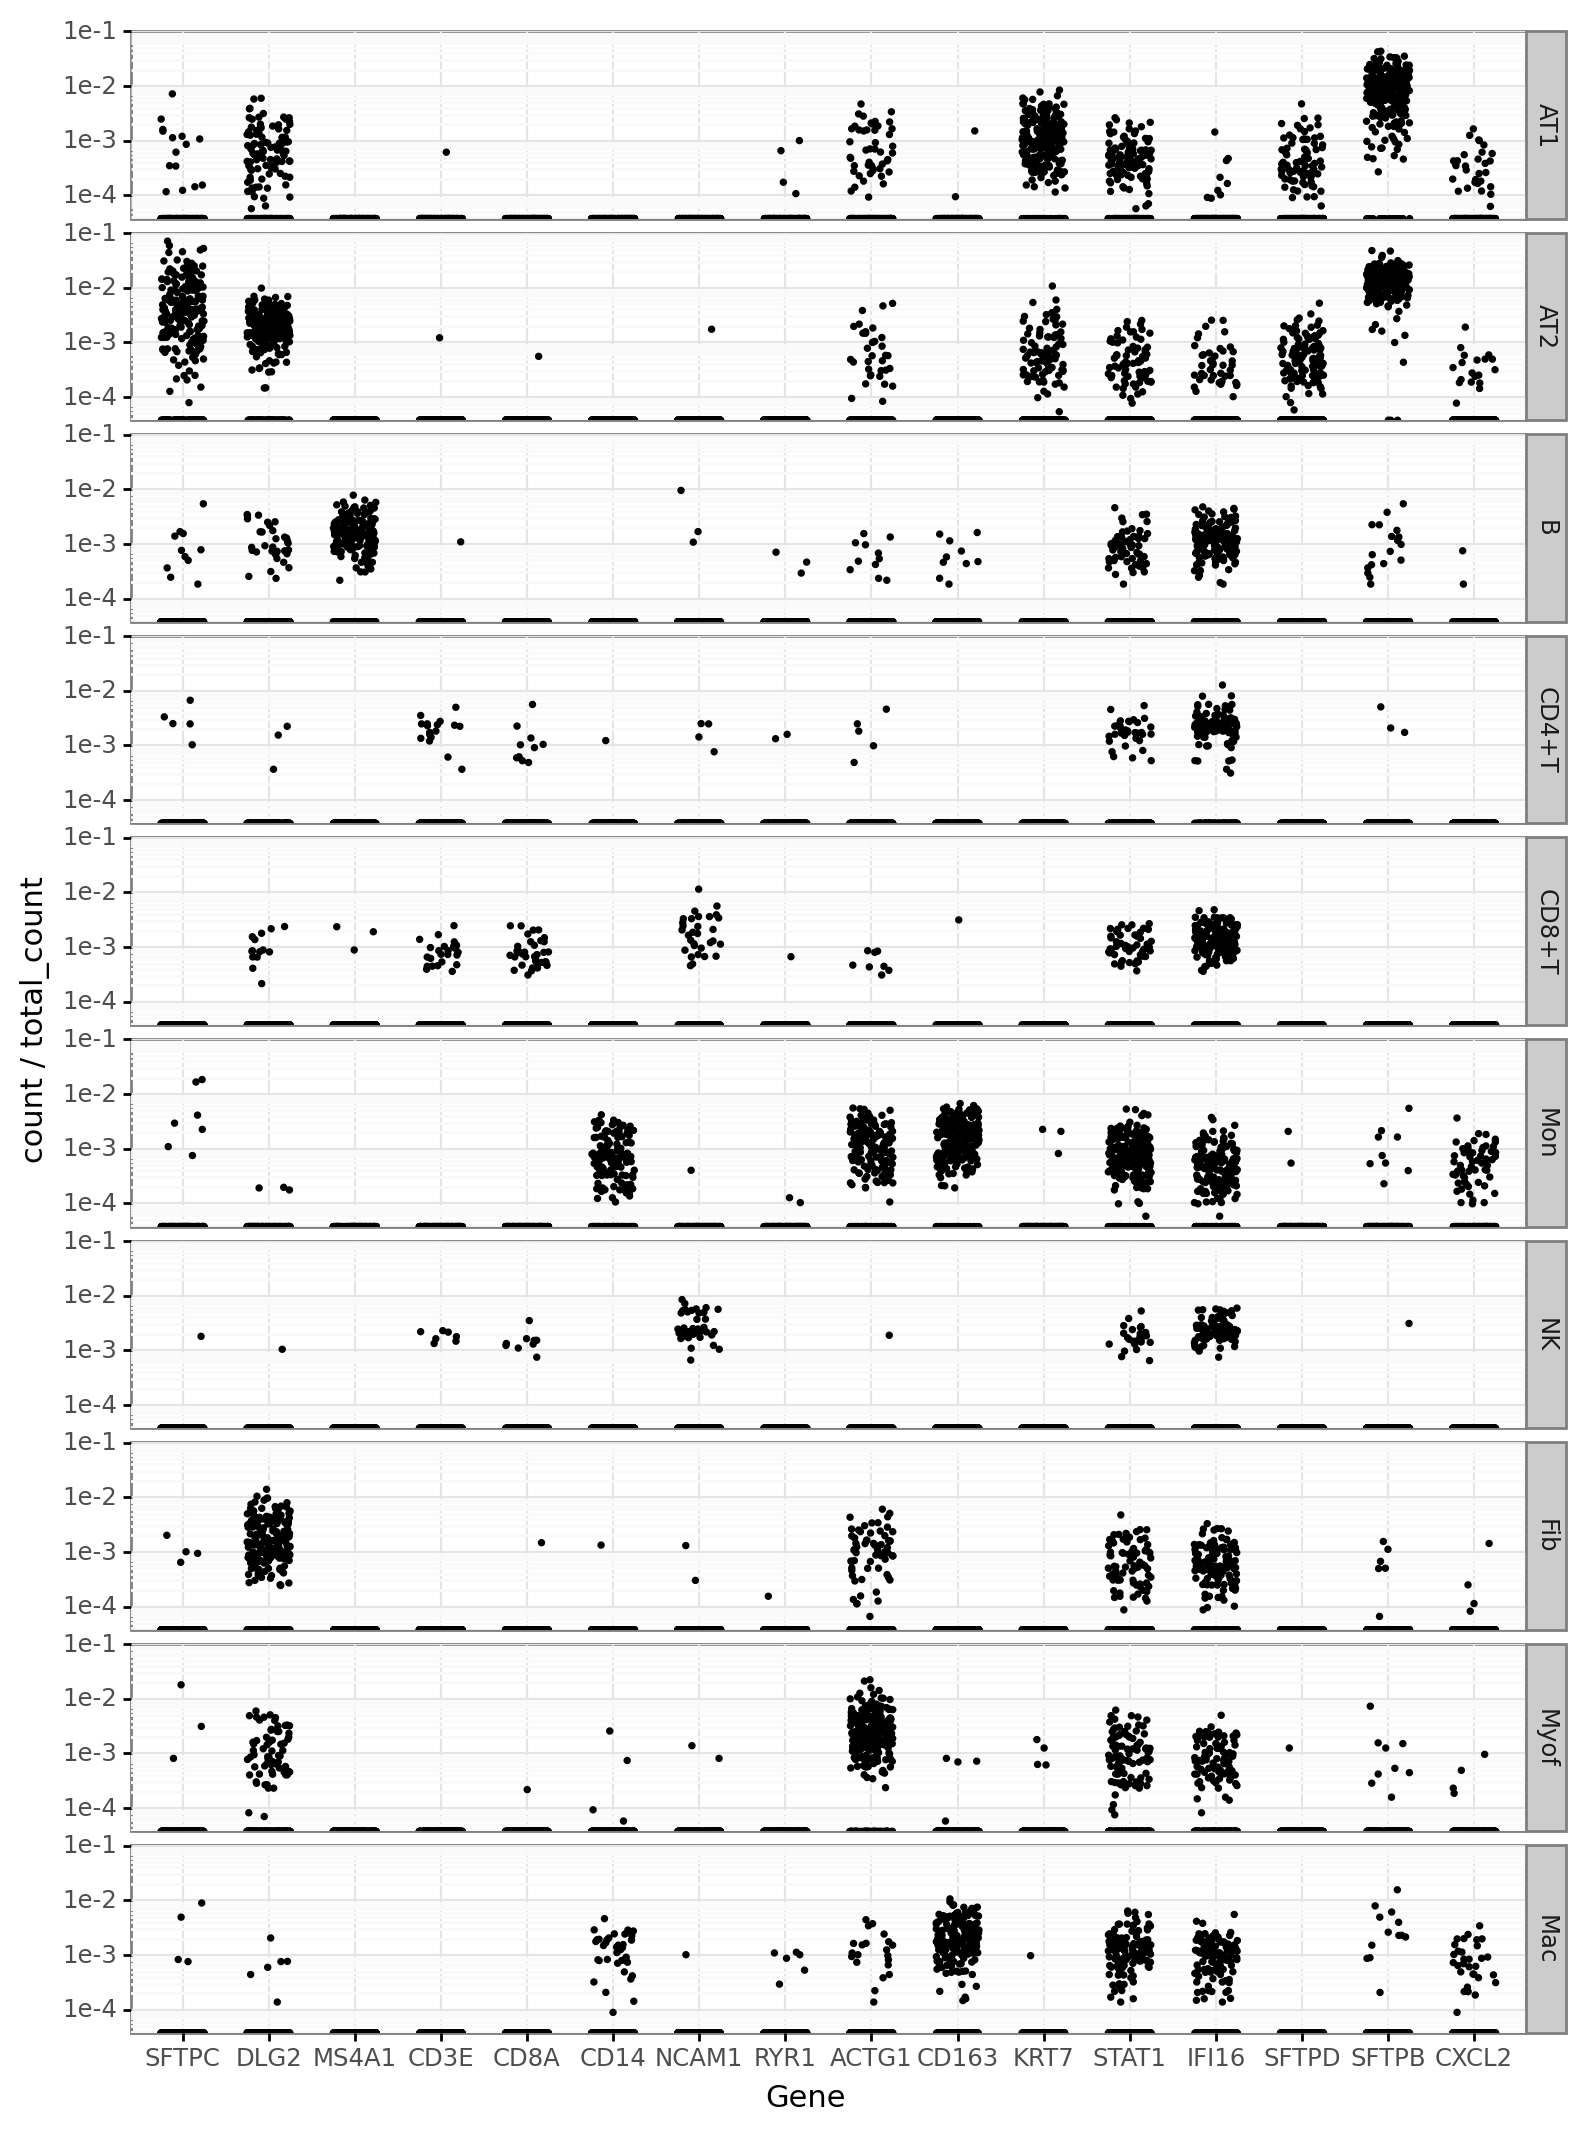

<ggplot: (8755663855400)>

In [133]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'count / total_count'), sobs_long)
    + p.geom_jitter(height = 0, shape = '.', width = 0.25)
    + p.scale_y_log10()
    + p.theme_bw()
    + p.facet_grid('short_name ~ .')
    + p.labs(x = 'Gene', y = 'count / total_count')
)

In [134]:
expr_rates['SubCluster'] = sadata.obs['SubCluster'].values

In [135]:
expr_rates_long = expr_rates.reset_index().melt(
    id_vars = ['barcodekey', 'SubCluster'],
    value_vars = select_genes,
    var_name = 'gene',
    value_name = 'rate'
)

expr_rates_long

,barcodekey,SubCluster,gene,rate
0,12-P617758-S008-R01-CGAGGAACATGTGTCA,AT1,SFTPC,4.874978e-05
1,02-P240970-S008-R01-TTTAGTCAGGTTCATC,AT1,SFTPC,6.124373e-06
2,02-P166169-S113-R01-CAAGACTAGTACAGAT,AT1,SFTPC,8.012004e-06
3,02-P166169-S099-R02-GACTACAGTTCGAATC,AT1,SFTPC,1.600083e-05
4,12-P890292-S007-R01-ATCGTGAAGACCACGA,AT1,SFTPC,1.993213e-05
...,...,...,...,...
47995,02-P348762-S056-R01-AAGTGAAAGGACGCTA,NK cells,CXCL2,2.177919e-07
47996,12-P485759-S008-R01-CAAGCTATCGAGATGG,NK cells,CXCL2,8.972512e-08
47997,02-P348762-S056-R01-AGTCAACCACTTCTCG,NK cells,CXCL2,2.292736e-07
47998,02-P334354-S087-R01-TGACAGTGTTTGTTGG,NK cells,CXCL2,3.456424e-07


In [136]:
expr_rates_long['gene'] = expr_rates_long['gene'].pipe(pd.Categorical, categories = select_genes)
expr_rates_long['SubCluster'] = expr_rates_long['SubCluster'].pipe(pd.Categorical, categories = select_celltypes)

In [137]:


expr_rates_long['short_name'] = expr_rates_long['SubCluster'].map(short_names)

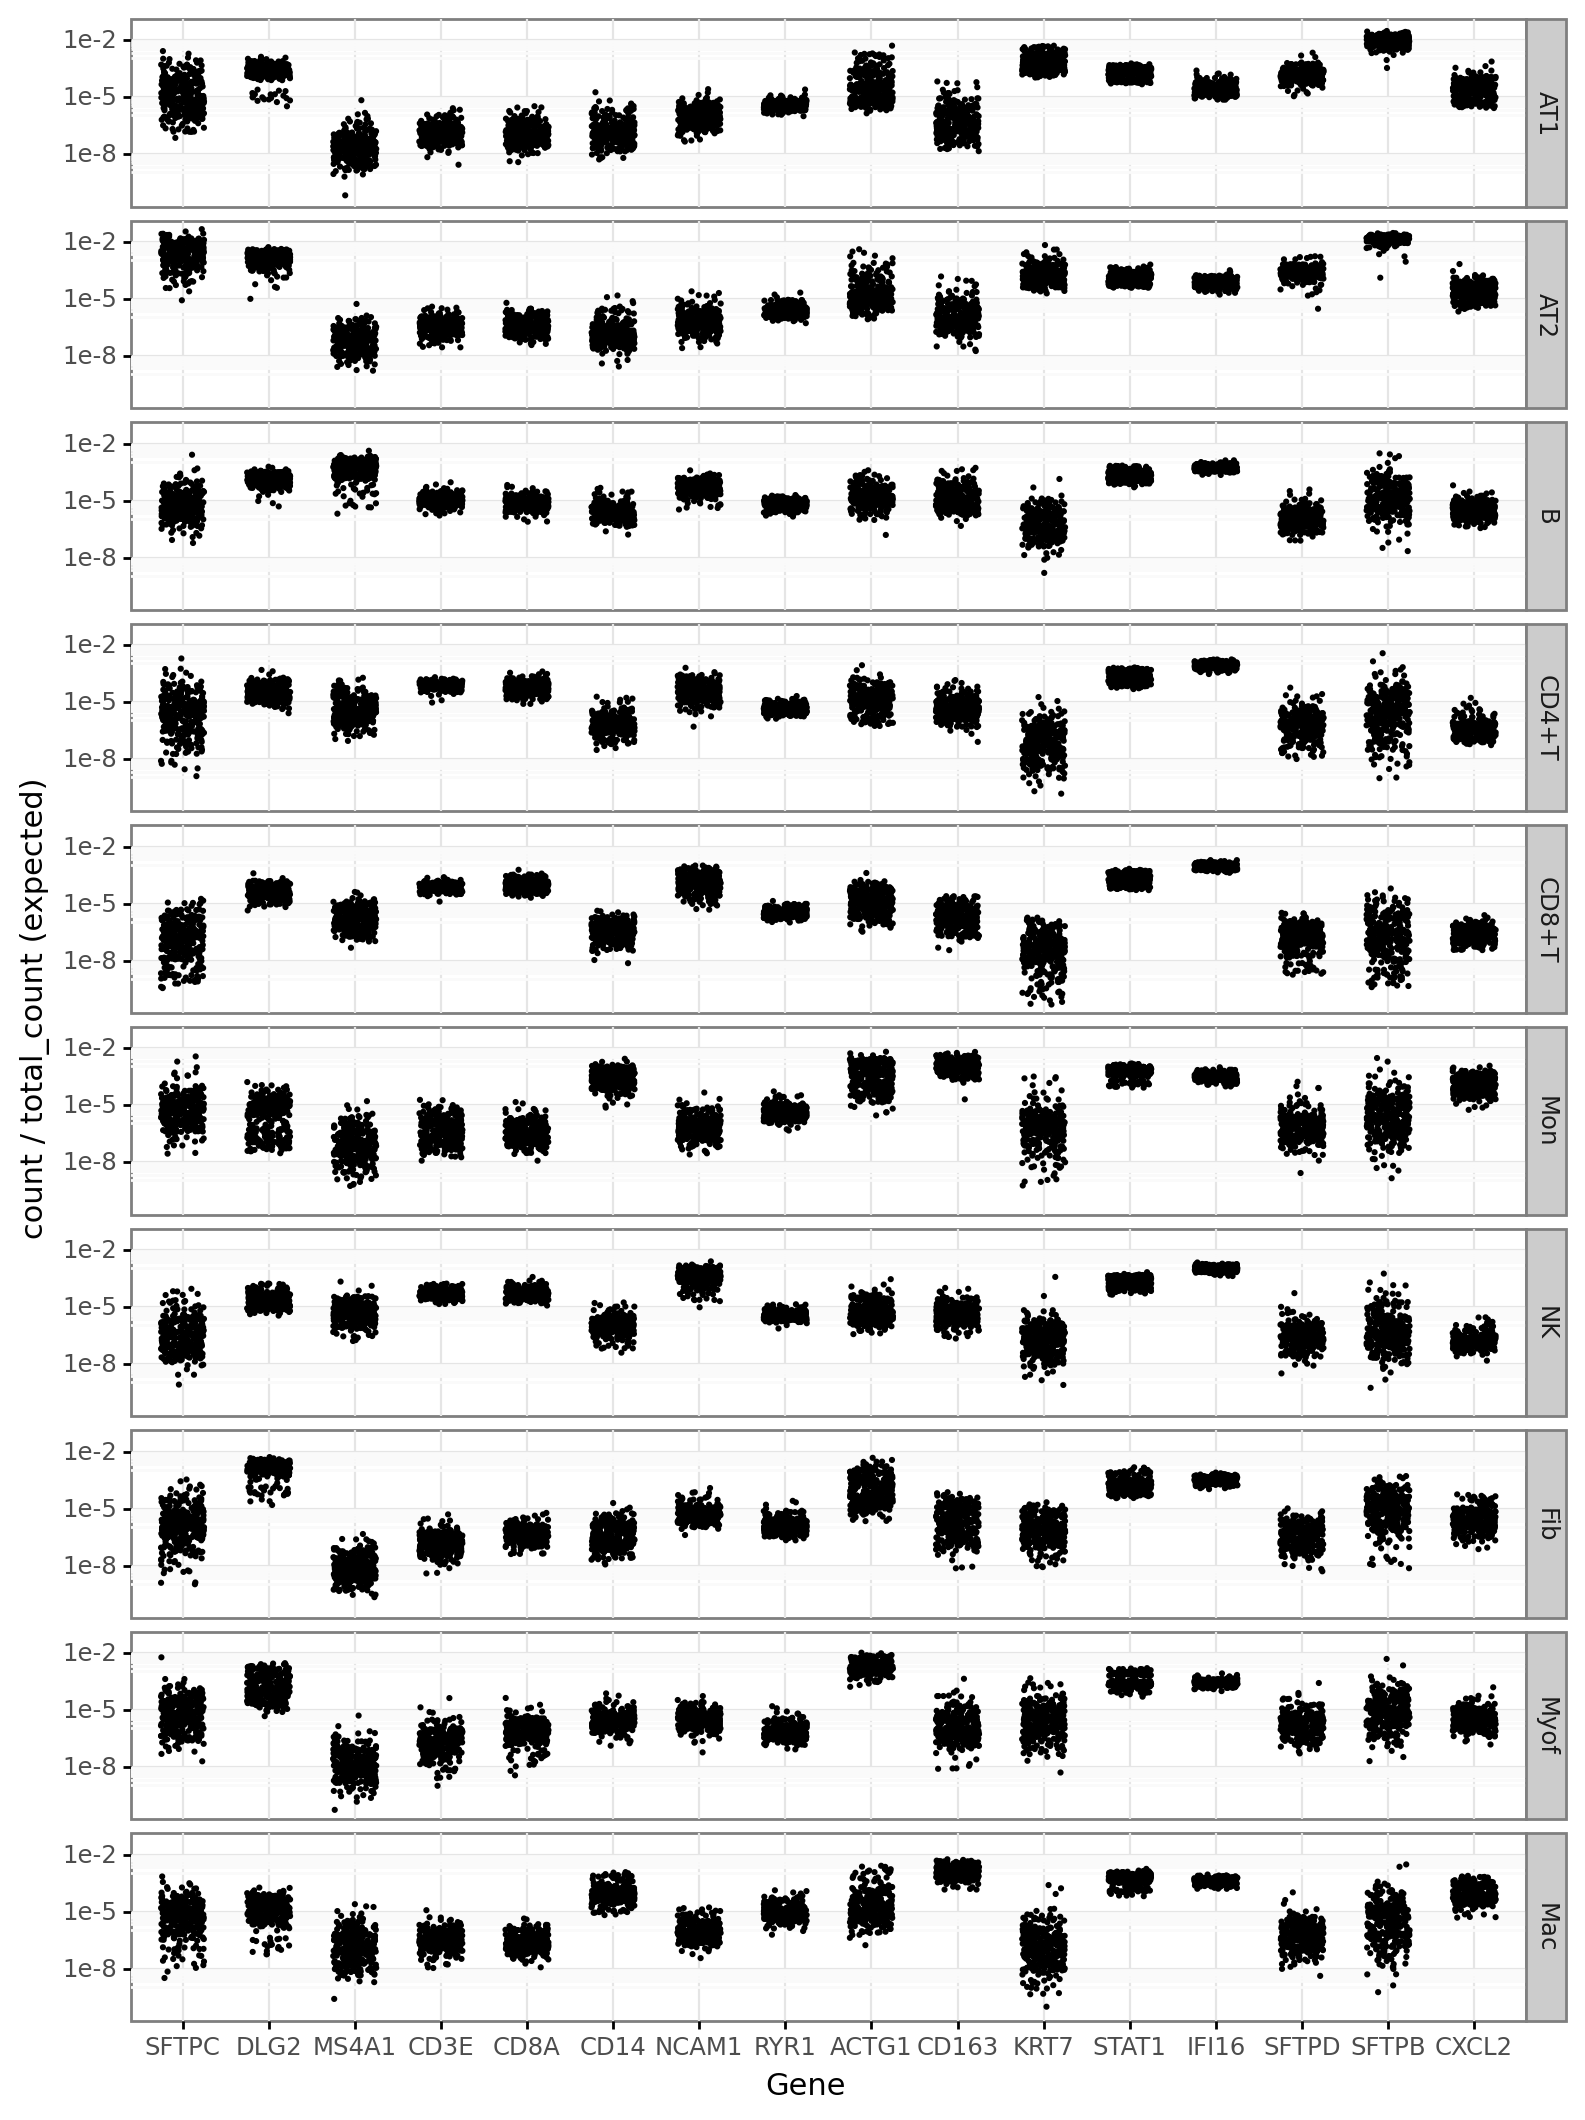

<ggplot: (8756059899917)>

In [138]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'rate'), expr_rates_long)
    + p.geom_jitter(height = 0, shape = '.', width = 0.25, size = 1)
    + p.scale_y_log10()
    + p.theme_bw()
    + p.facet_grid('short_name ~ .')
    + p.labs(x = 'Gene', y = 'count / total_count (expected)')
)

In [139]:
results = expr_rates_long.groupby(['short_name', 'gene'])['rate'].mean().reset_index()

results = (
    results
    .merge(expr_rates_long.groupby(['short_name', 'gene'])['rate'].quantile(0.025).rename('lower').reset_index())
    .merge(expr_rates_long.groupby(['short_name', 'gene'])['rate'].quantile(0.975).rename('upper').reset_index())
)

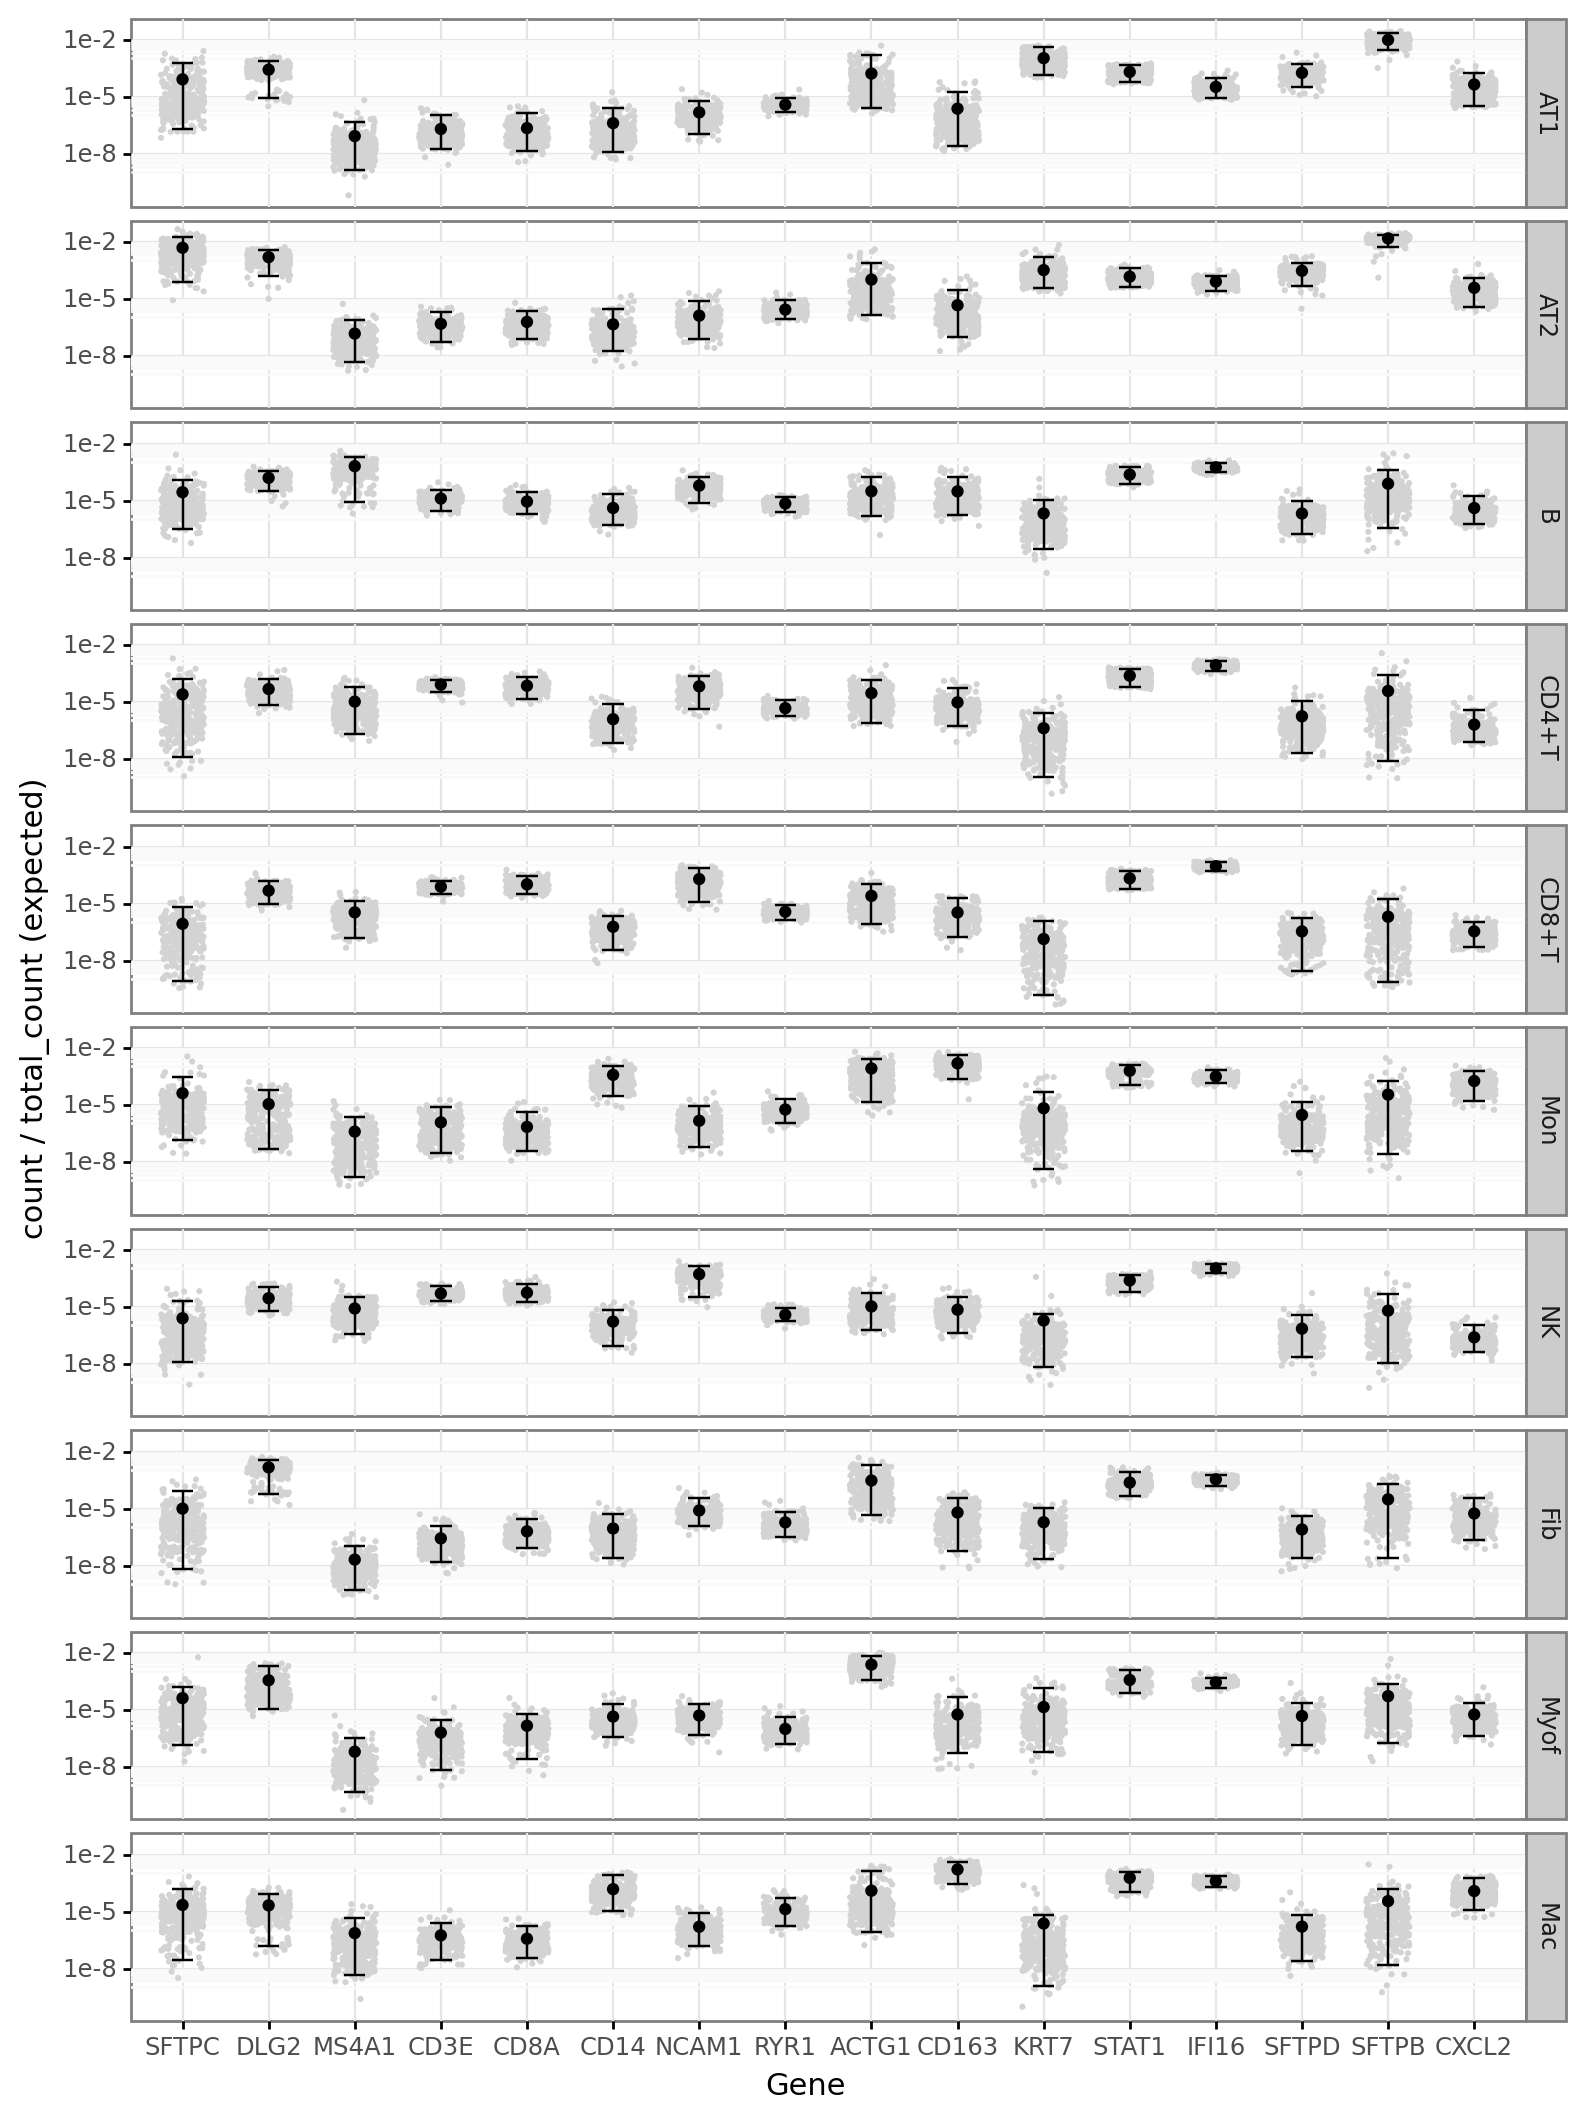

<ggplot: (8755661347097)>

In [141]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'rate'), results)
    + p.geom_jitter(height = 0, shape = '.', width = 0.25, size = 1, color = 'lightgrey', data = expr_rates_long)
    + p.geom_point()
    + p.geom_errorbar(p.aes(ymin = 'lower', ymax = 'upper'), width = 0.25)
    + p.scale_y_log10()
    + p.theme_bw()
    + p.facet_grid('short_name ~ .')
    + p.labs(x = 'Gene', y = 'count / total_count (expected)')
)

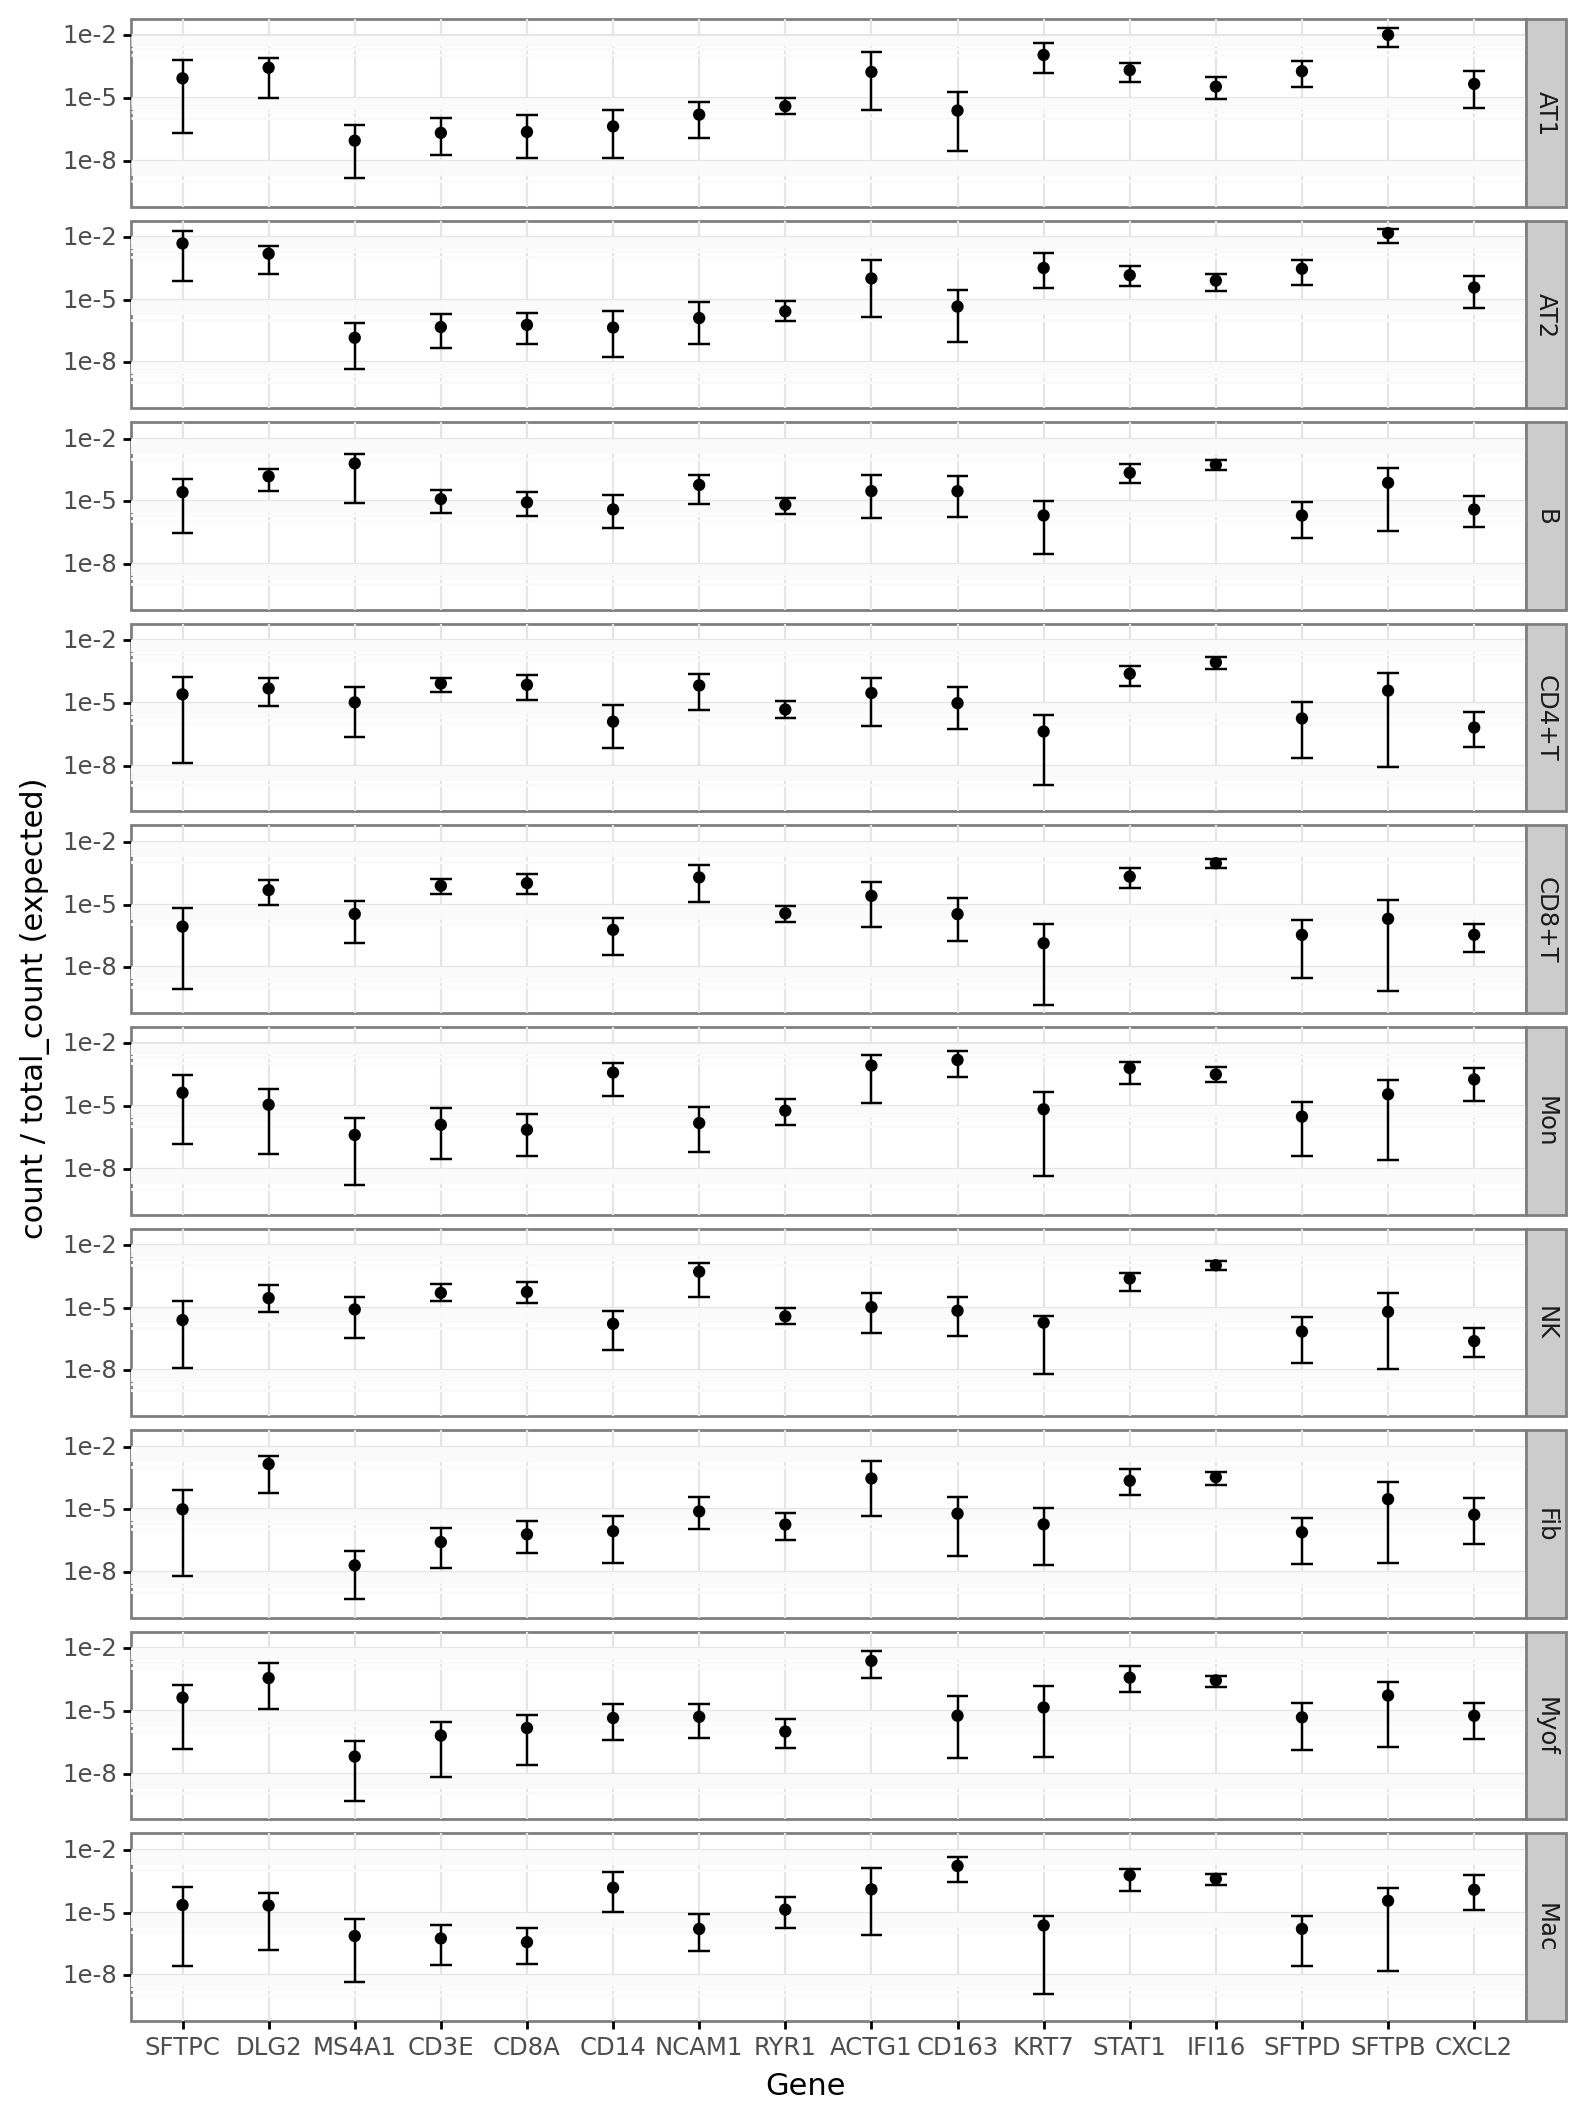

<ggplot: (8755661373377)>

In [142]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'rate'), results)
    + p.geom_point()
    + p.geom_errorbar(p.aes(ymin = 'lower', ymax = 'upper'), width = 0.25)
    + p.scale_y_log10()
    + p.theme_bw()
    + p.facet_grid('short_name ~ .')
    + p.labs(x = 'Gene', y = 'count / total_count (expected)')
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


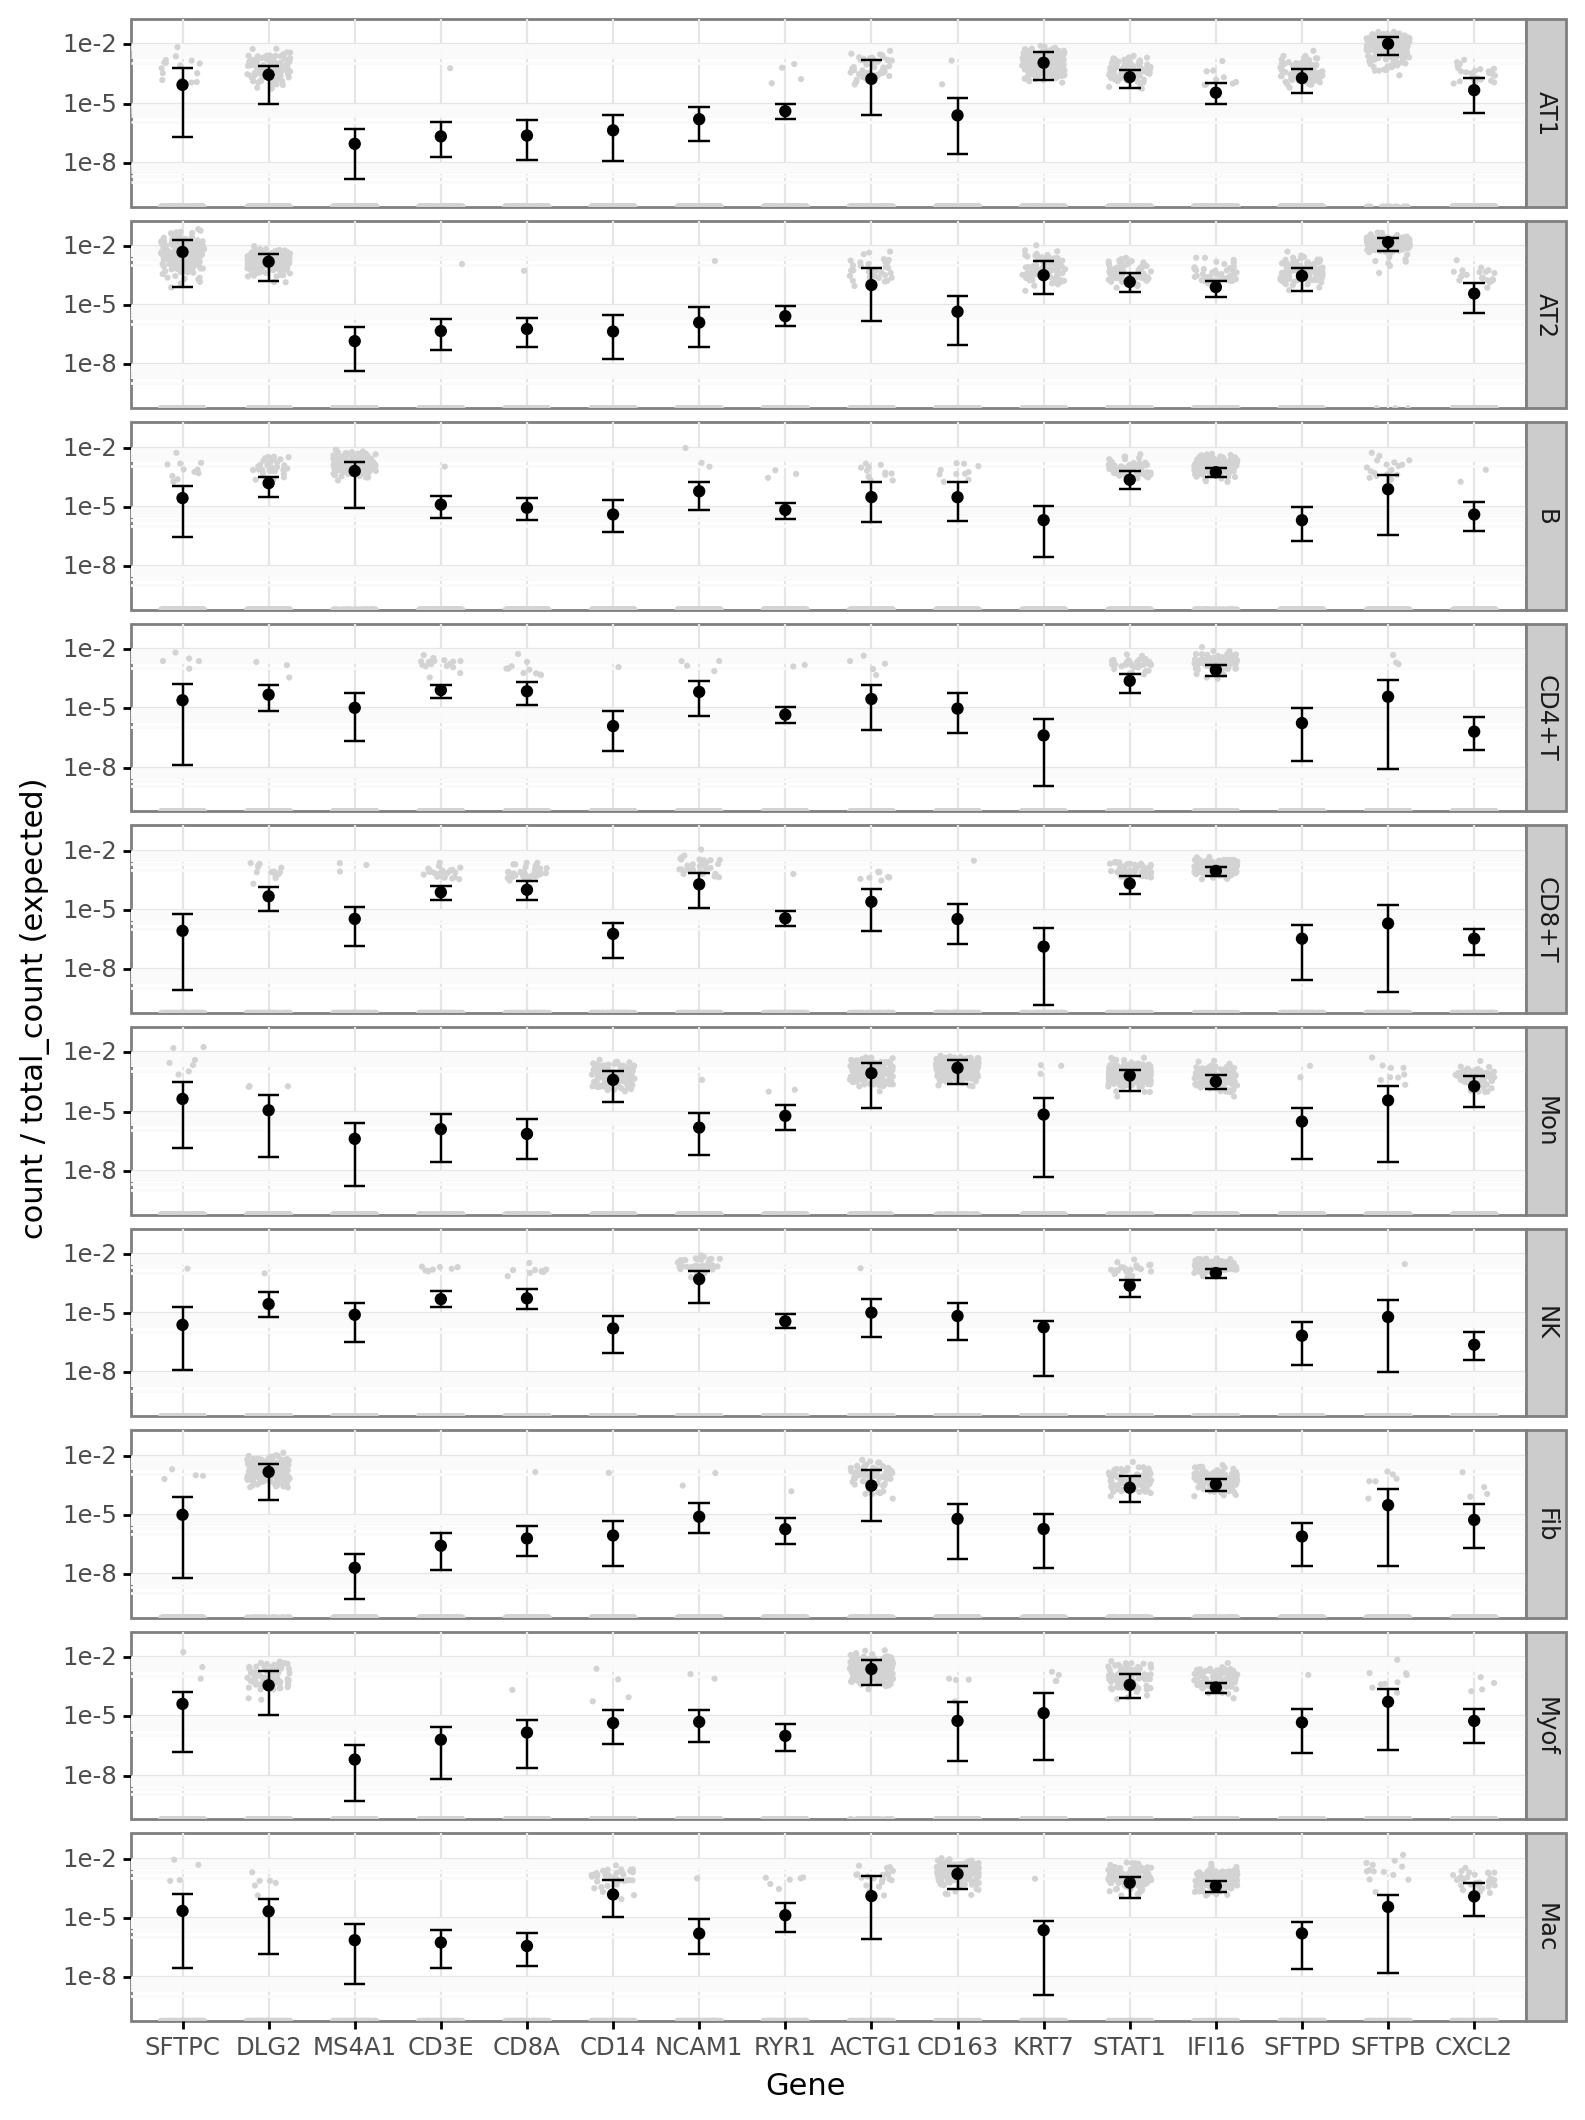

<ggplot: (8755857431447)>

In [143]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'rate'), results)
    + p.geom_jitter(p.aes(y = 'count / total_count'), height = 0, shape = '.', width = 0.25, size = 1, color = 'lightgrey', data = sobs_long)
    + p.geom_point()
    + p.geom_errorbar(p.aes(ymin = 'lower', ymax = 'upper'), width = 0.25)
    + p.scale_y_log10()
    + p.theme_bw()
    + p.facet_grid('short_name ~ .')
    + p.labs(x = 'Gene', y = 'count / total_count (expected)')
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_point : Removed 29 rows containing missing values.
/home/ubuntu/miniconda3/lib/python3.8/site-packages/plotnine/layer.py:467: PlotnineWarning: geom_errorbar : Removed 88 rows containing missing values.


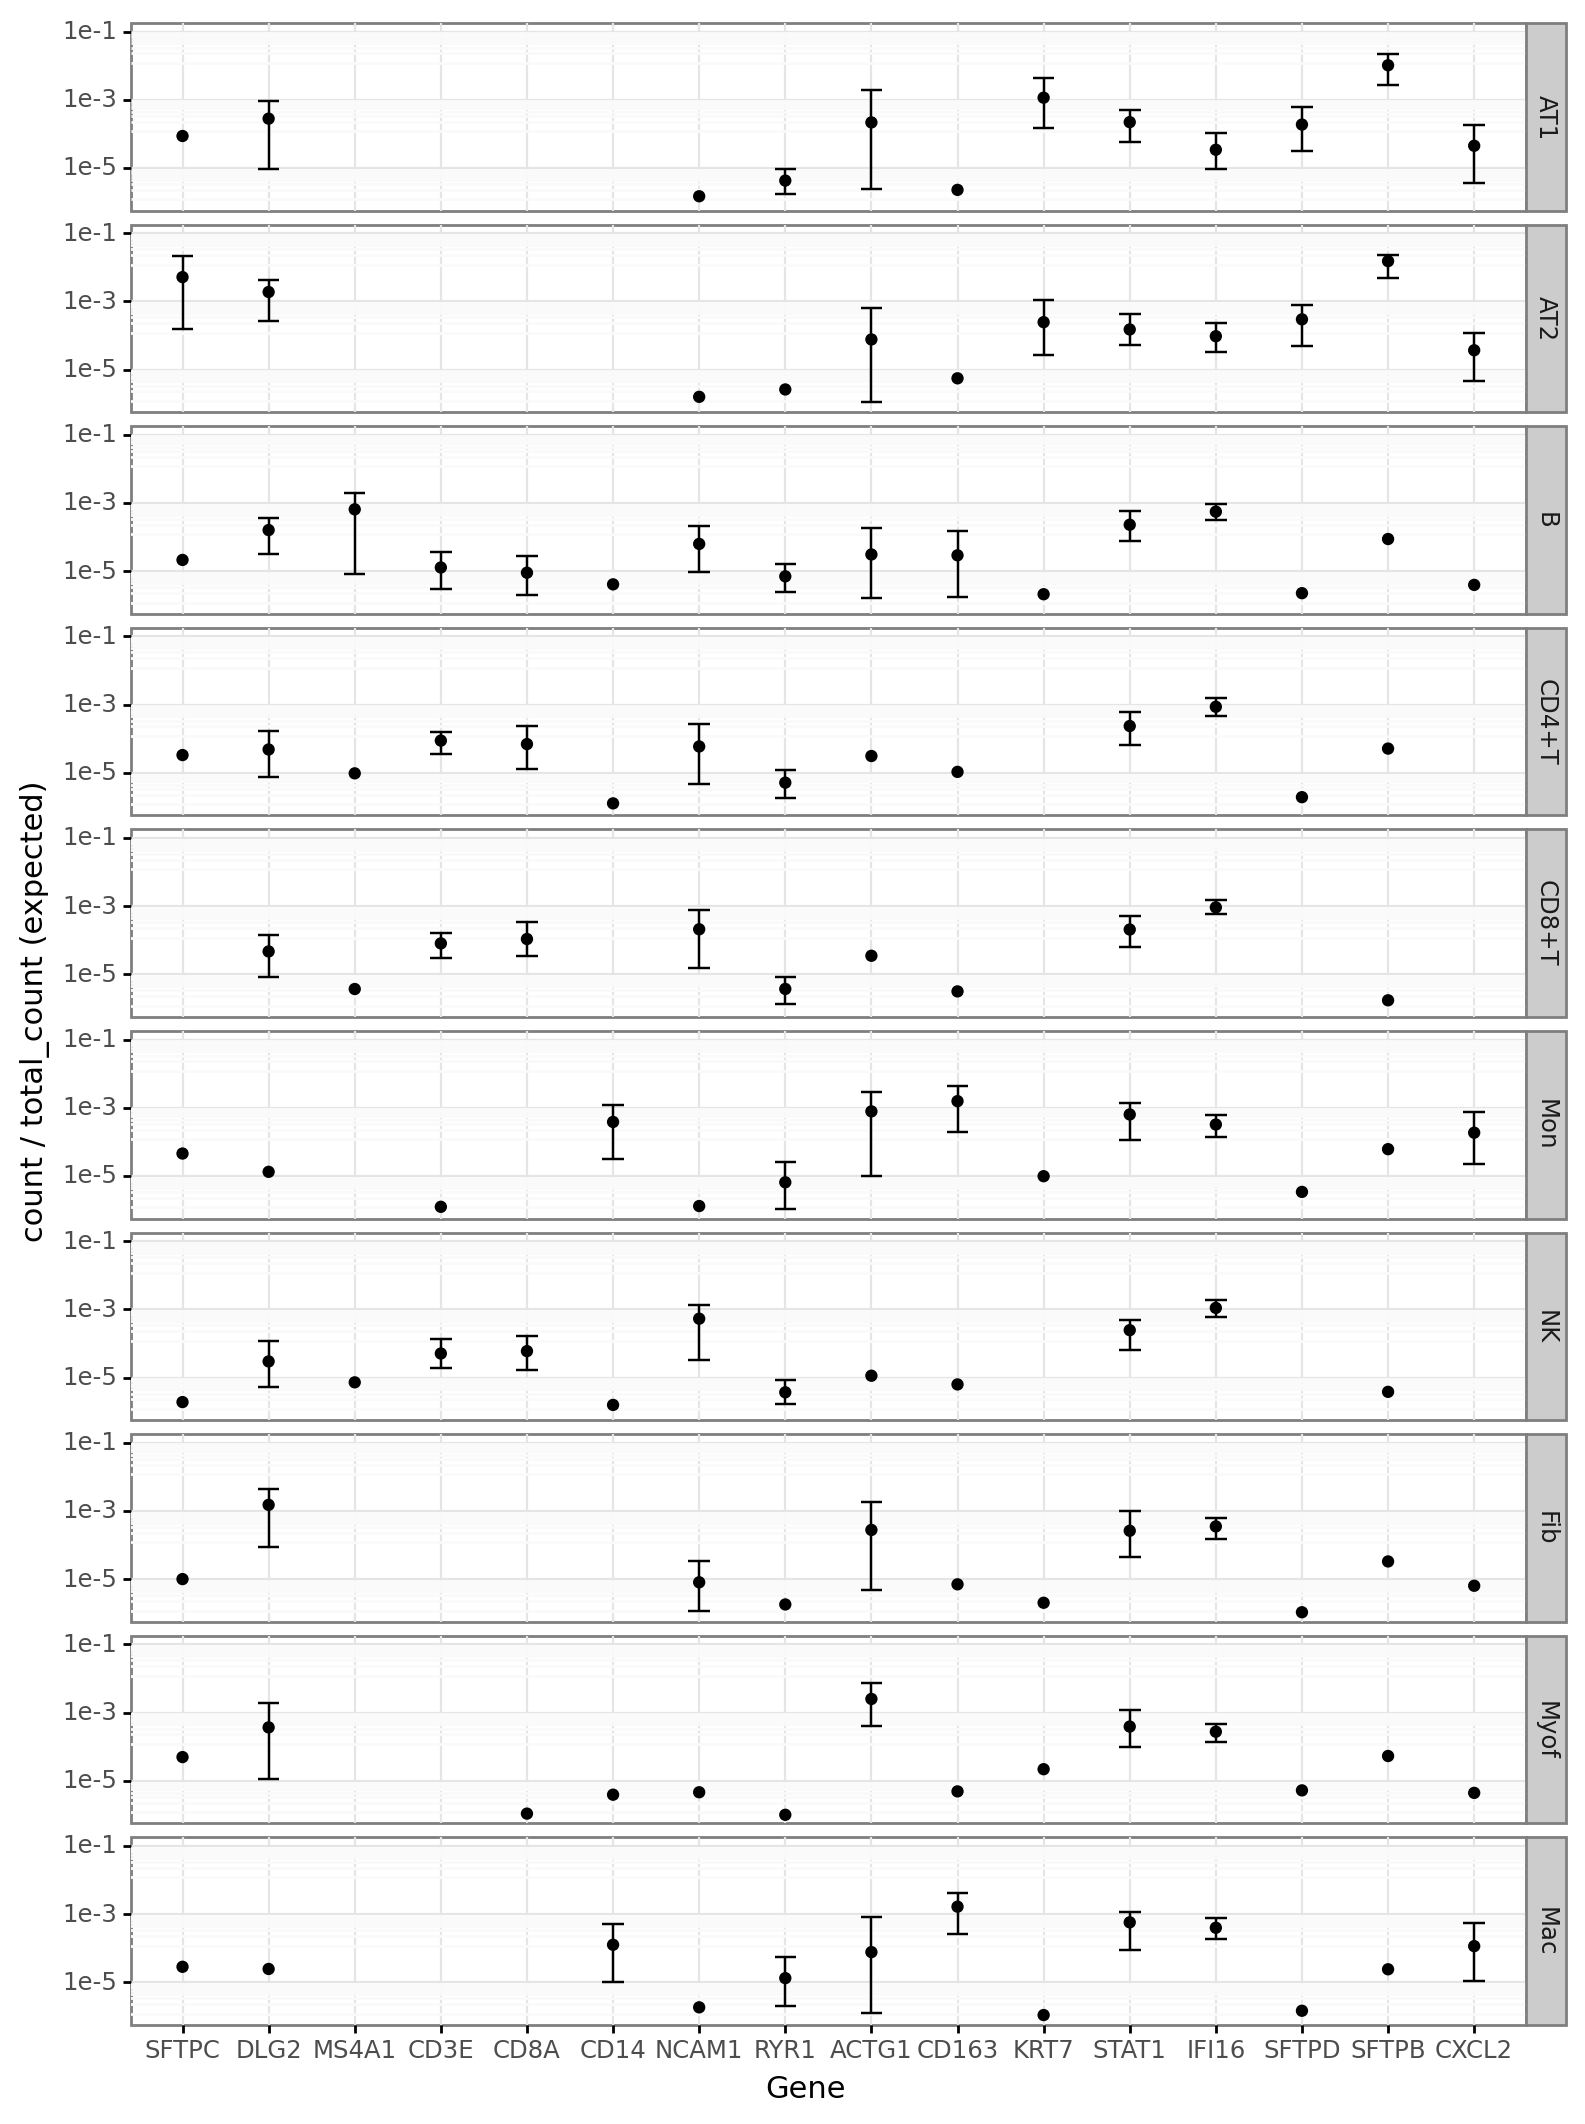

<ggplot: (8755663365904)>

In [60]:
p.options.figure_size = 9, 13

(
    p.ggplot(p.aes(x = 'gene', y = 'rate'), results)
    + p.geom_point()
    + p.geom_errorbar(p.aes(ymin = 'lower', ymax = 'upper'), width = 0.25)
    + p.scale_y_log10(limits = (1e-6, 1e-1))
    + p.theme_bw()
    + p.facet_grid('short_name ~ .')
    + p.labs(x = 'Gene', y = 'count / total_count (expected)')
)

In [149]:
expr_rates['short_name'] = expr_rates['SubCluster'].map(short_names)
sadata.obs['short_name'] = sadata.obs['SubCluster'].map(short_names)

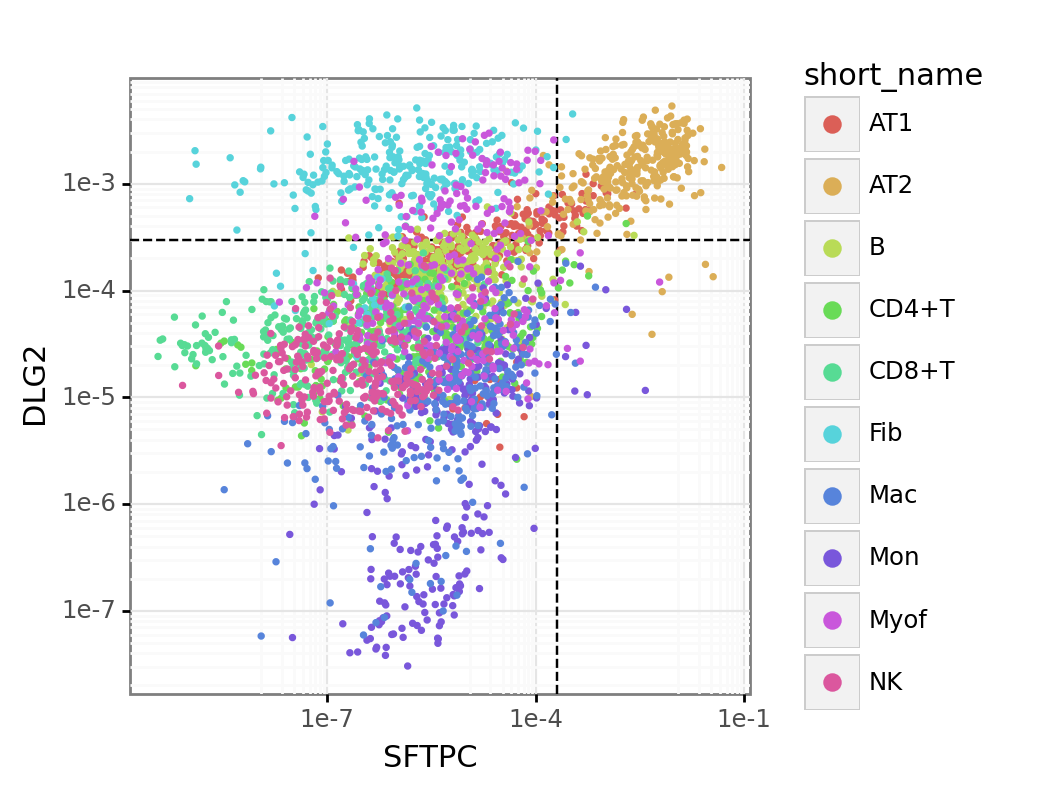

<ggplot: (8755685816534)>

In [150]:
p.options.figure_size = 4, 4

(
    p.ggplot(p.aes(x = 'SFTPC', y = 'DLG2', color = 'short_name'), expr_rates)
    + p.geom_vline(xintercept = 2e-4, linetype = 'dashed')
    + p.geom_hline(yintercept = 3e-4, linetype = 'dashed')
    + p.geom_point(shape = '.')
    + p.scale_x_log10()
    + p.scale_y_log10()
    + p.theme_bw()
    + p.guides(color = p.guide_legend(override_aes = {'size': 6}))
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


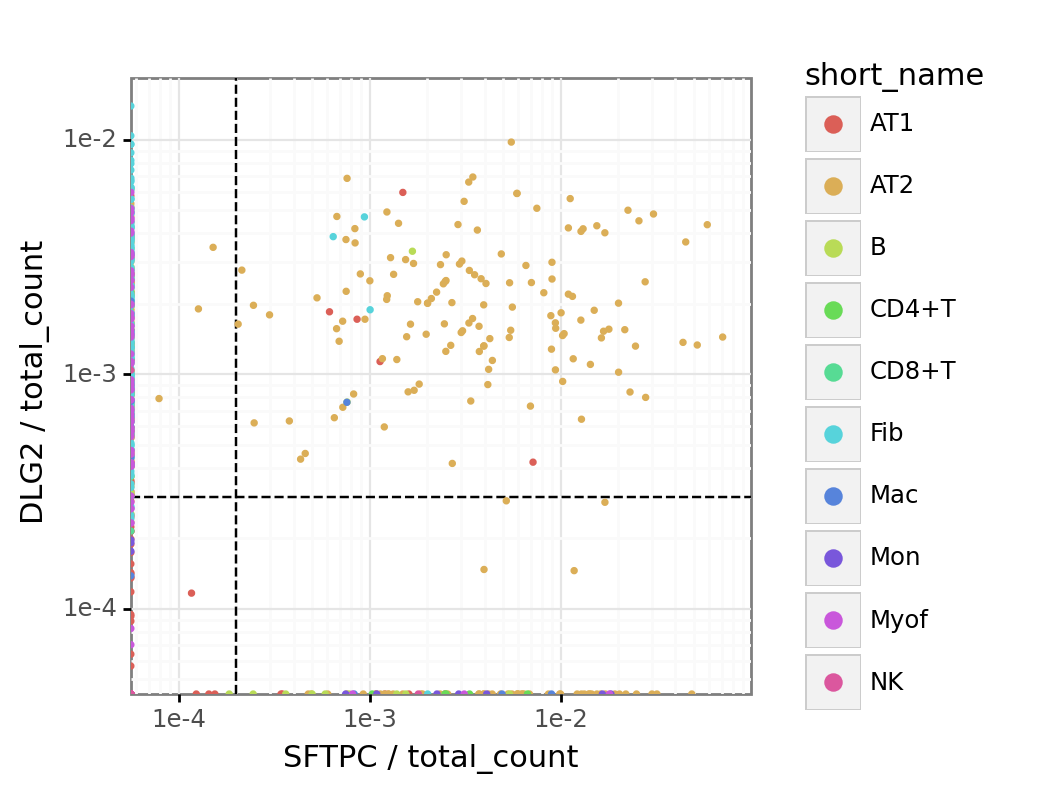

<ggplot: (8755655162715)>

In [155]:
p.options.figure_size = 4, 4

(
    p.ggplot(p.aes(x = 'SFTPC / total_count', y = 'DLG2 / total_count', color = 'short_name'), sadata.obs)
    + p.geom_vline(xintercept = 2e-4, linetype = 'dashed')
    + p.geom_hline(yintercept = 3e-4, linetype = 'dashed')
    + p.geom_point(shape = '.')
    + p.scale_x_log10()
    + p.scale_y_log10()
    + p.theme_bw()
    + p.guides(color = p.guide_legend(override_aes = {'size': 6}))
)

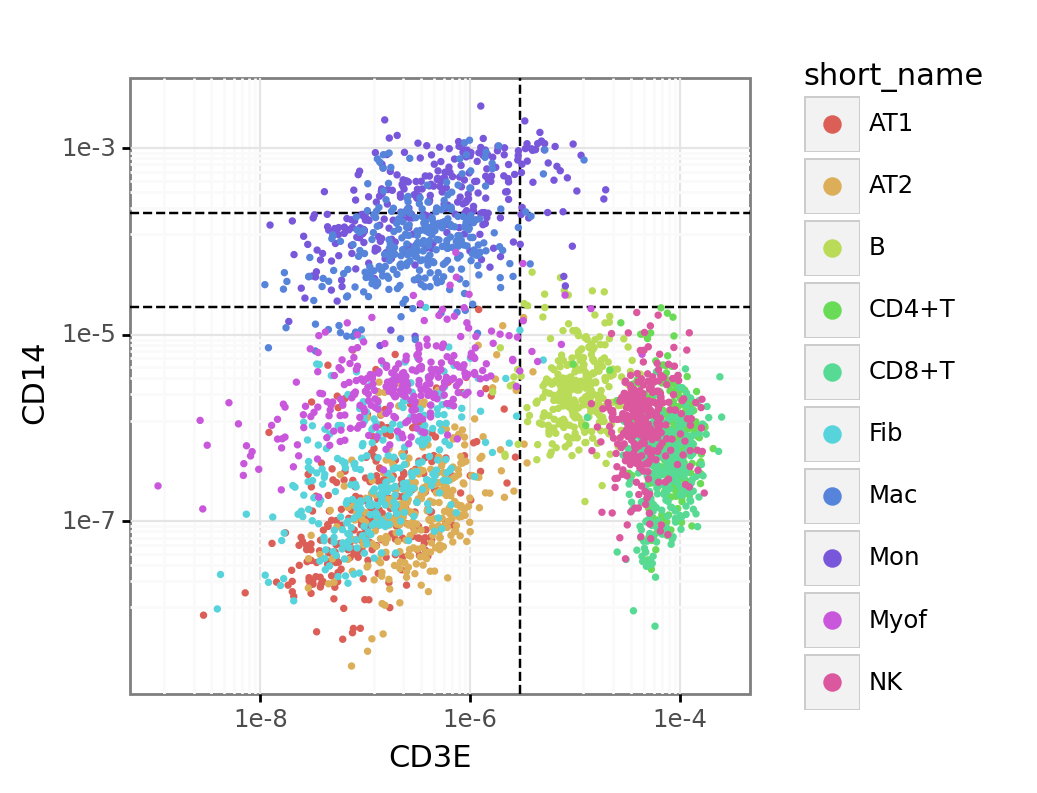

<ggplot: (8755655233982)>

In [156]:
p.options.figure_size = 4, 4

(
    p.ggplot(p.aes(x = 'CD3E', y = 'CD14', color = 'short_name'), expr_rates)
    + p.geom_vline(xintercept = 3e-6, linetype = 'dashed')
    + p.geom_hline(yintercept = 2e-5, linetype = 'dashed')
    + p.geom_hline(yintercept = 2e-4, linetype = 'dashed')
    + p.geom_point(shape = '.')
    + p.scale_x_log10()
    + p.scale_y_log10()
    + p.theme_bw()
    + p.guides(color = p.guide_legend(override_aes = {'size': 6}))
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


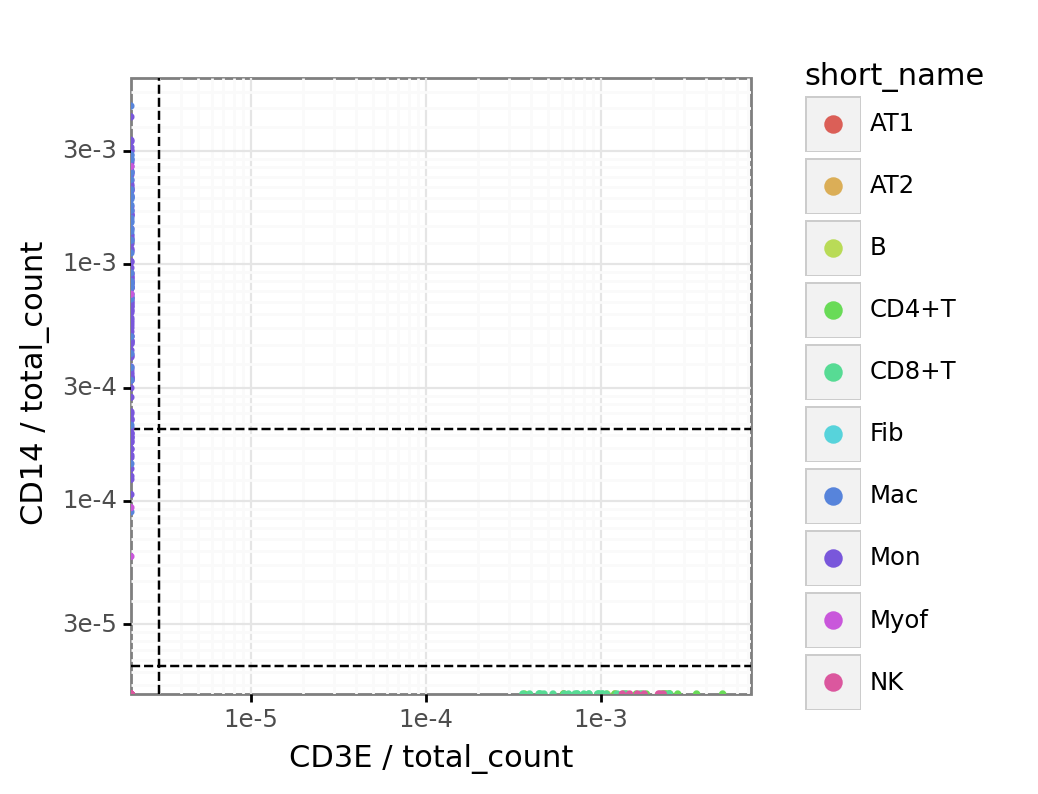

<ggplot: (8755654856006)>

In [159]:
p.options.figure_size = 4, 4

(
    p.ggplot(p.aes(x = 'CD3E / total_count', y = 'CD14 / total_count', color = 'short_name'), sadata.obs)
    + p.geom_vline(xintercept = 3e-6, linetype = 'dashed')
    + p.geom_hline(yintercept = 2e-5, linetype = 'dashed')
    + p.geom_hline(yintercept = 2e-4, linetype = 'dashed')
    + p.geom_point(shape = '.')
    + p.scale_x_log10()
    + p.scale_y_log10()
    + p.theme_bw()
    + p.guides(color = p.guide_legend(override_aes = {'size': 6}))
)

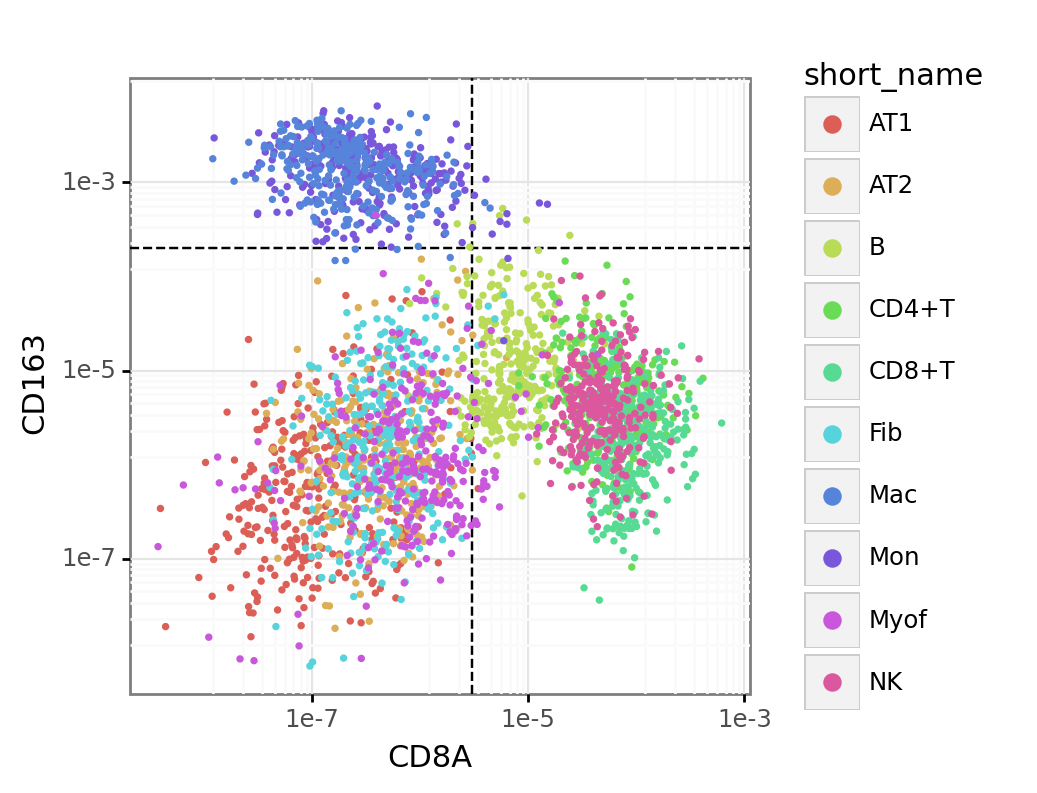

<ggplot: (8755654792126)>

In [160]:
p.options.figure_size = 4, 4

(
    p.ggplot(p.aes(x = 'CD8A', y = 'CD163', color = 'short_name'), expr_rates)
    + p.geom_vline(xintercept = 3e-6, linetype = 'dashed')
    + p.geom_hline(yintercept = 2e-4, linetype = 'dashed')
    + p.geom_point(shape = '.')
    + p.scale_x_log10()
    + p.scale_y_log10()
    + p.theme_bw()
    + p.guides(color = p.guide_legend(override_aes = {'size': 6}))
)

/home/ubuntu/miniconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10


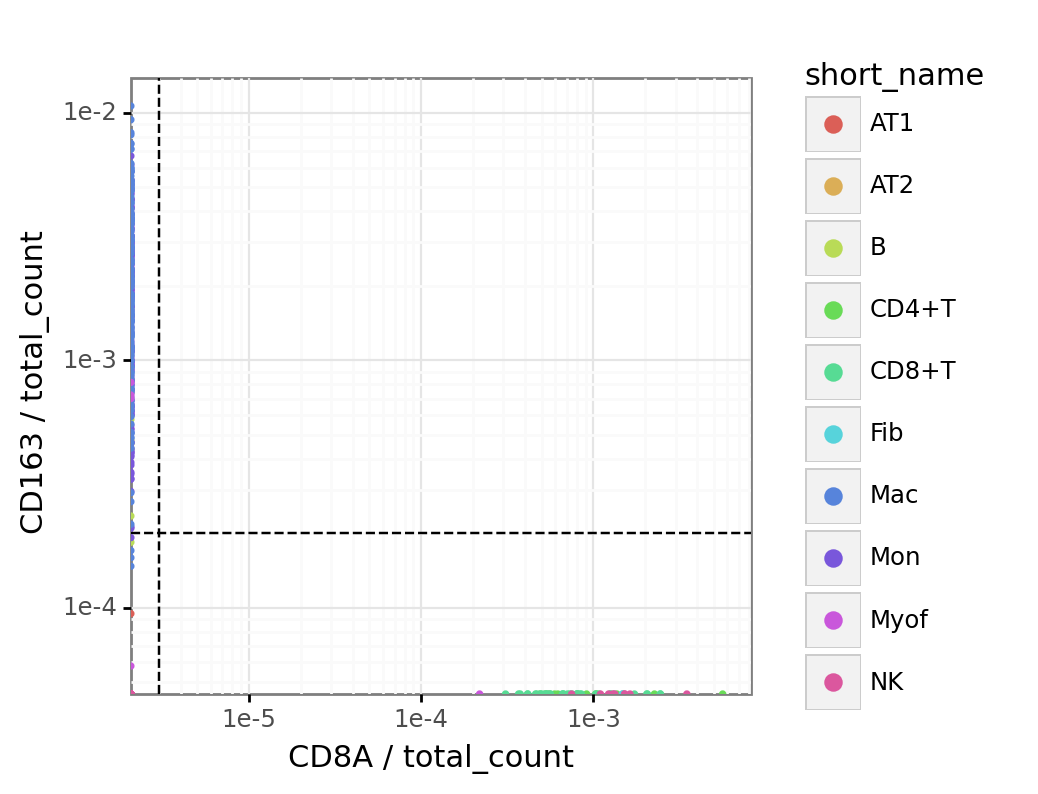

<ggplot: (8755848985661)>

In [164]:
p.options.figure_size = 4, 4

(
    p.ggplot(p.aes(x = 'CD8A / total_count', y = 'CD163 / total_count', color = 'short_name'), sadata.obs)
    + p.geom_vline(xintercept = 3e-6, linetype = 'dashed')
    + p.geom_hline(yintercept = 2e-4, linetype = 'dashed')
    + p.geom_point(shape = '.')
    + p.scale_x_log10()
    + p.scale_y_log10()
    + p.theme_bw()
    + p.guides(color = p.guide_legend(override_aes = {'size': 6}))
)

In [99]:
sadata.obs['short_name'] = sadata.obs['SubCluster'].map(short_names)

In [101]:
marker_results = vae.differential_expression(sadata, groupby = 'short_name')

DE...: 100%|██████████| 10/10 [00:50<00:00,  5.06s/it]


In [112]:
(
    marker_results
    .reset_index()
    .query('featurekey in @select_genes')[['comparison', 'featurekey', 'proba_de', 'lfc_mean']]
    .sort_values('lfc_mean', ascending = False)
    .assign(fc_mean = lambda s: 2 ** s['lfc_mean'])
    .head(20)
)

,comparison,featurekey,proba_de,lfc_mean,fc_mean
20010,B vs Rest,MS4A1,0.9986,11.423460,2746.655029
10335,AT2 vs Rest,SFTPB,0.9832,11.268409,2466.772217
43,AT1 vs Rest,KRT7,0.9950,10.449073,1397.926514
416,AT1 vs Rest,SFTPB,0.9814,10.424143,1373.977661
10005,AT2 vs Rest,SFTPC,0.9994,10.343406,1299.198120
60062,Mac vs Rest,CD163,0.9860,8.244208,303.217316
70073,Mon vs Rest,CD163,0.9864,8.099564,274.291016
70052,Mon vs Rest,CD14,0.9880,8.044173,263.959595
10212,AT2 vs Rest,SFTPD,0.9874,8.011895,258.119476
10146,AT2 vs Rest,KRT7,0.9906,7.987919,253.865280


In [113]:
(
    marker_results
    .reset_index()
    .query('featurekey in @select_genes')[['comparison', 'featurekey', 'proba_de', 'lfc_mean']]
    .sort_values('lfc_mean', ascending = False)
    .assign(fc_mean = lambda s: 2 ** s['lfc_mean'])
    .query('featurekey == "SFTPC"')
)

,comparison,featurekey,proba_de,lfc_mean,fc_mean
10005,AT2 vs Rest,SFTPC,0.9994,10.343406,1299.198120
1202,AT1 vs Rest,SFTPC,0.9646,1.214242,2.320189
60758,Mac vs Rest,SFTPC,0.9642,0.695837,1.619824
82486,Myof vs Rest,SFTPC,0.9622,0.476230,1.391104
21258,B vs Rest,SFTPC,0.9562,0.406211,1.325200
71262,Mon vs Rest,SFTPC,0.9624,0.270618,1.206324
30367,CD4+T vs Rest,SFTPC,0.9612,-0.913049,0.531062
51039,Fib vs Rest,SFTPC,0.9672,-2.217187,0.215060
90159,NK vs Rest,SFTPC,0.9744,-4.586297,0.041628
40097,CD8+T vs Rest,SFTPC,0.9728,-5.638350,0.020076
